### Problem Statement:1
    You are hired by one of the leading news channel CNBE who wants to analyze 
    recent elections. This survey was conducted on 1525 voters with 9 variables. You 
    have to build a model, to predict which party a voter will vote for on the basis of the 
    given information, to create an exit poll that will help in predicting overall win and 
    seats covered by a particular party.



### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [4]:
data_df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [5]:
data_df=data_df.drop('Unnamed: 0',axis=1)

In [6]:
data_df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [7]:
data_df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [8]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [11]:
print('The dataset has {} rows and {} columns'.format(data_df.shape[0],data_df.shape[1]))

The dataset has 1525 rows and 9 columns


In [12]:
data_df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [13]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [14]:
data_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [17]:
data_df.duplicated().sum()

8

In [18]:
data_df.drop_duplicates(inplace=True)

In [20]:
data_df.shape

(1517, 9)

### Descriptive Statistics for the dataset

In [19]:
data_df.describe(include='all').T

count unique     top  freq     mean       std  min  \
vote                     1517      2  Labour  1057      NaN       NaN  NaN   
age                      1517    NaN     NaN   NaN  54.2413   15.7017   24   
economic.cond.national   1517    NaN     NaN   NaN  3.24522  0.881792    1   
economic.cond.household  1517    NaN     NaN   NaN  3.13777  0.931069    1   
Blair                    1517    NaN     NaN   NaN  3.33553   1.17477    1   
Hague                    1517    NaN     NaN   NaN  2.74951   1.23248    1   
Europe                   1517    NaN     NaN   NaN  6.74028   3.29904    1   
political.knowledge      1517    NaN     NaN   NaN  1.54054   1.08442    0   
gender                   1517      2  female   808      NaN       NaN  NaN   

                         25%  50%  75%  max  
vote                     NaN  NaN  NaN  NaN  
age                       41   53   67   93  
economic.cond.national     3    3    4    5  
economic.cond.household    3    3    4    5  
Blair                      2    4    4    5  
Hague                      2    2    4    5  
Europe                     4    6   10   11  
political.knowledge        0    2    2    3  
gender                   NaN  NaN  NaN  NaN

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers?

#### Value Count of Object Variables : 

In [21]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


### Univariate Analysis

Text(0.5, 1.0, 'Blair boxplot')

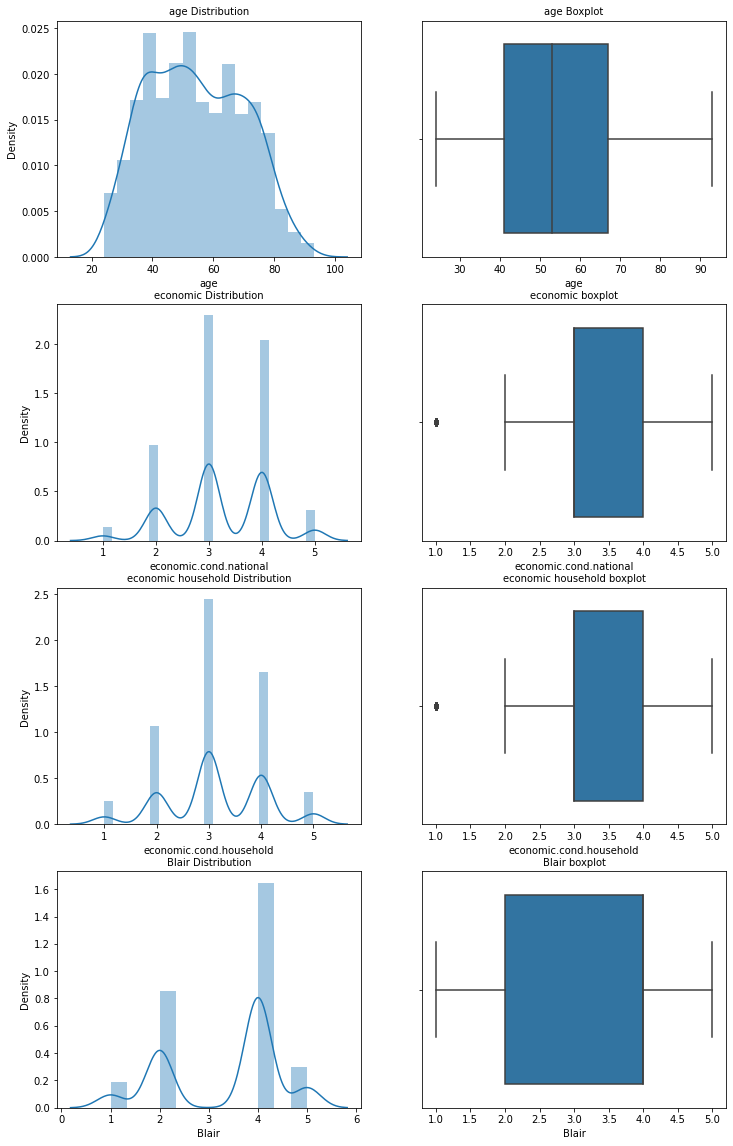

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,20)
a = sns.distplot(data_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(data_df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(data_df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(data_df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(data_df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

Text(0.5, 1.0, 'political knowledge boxplot')

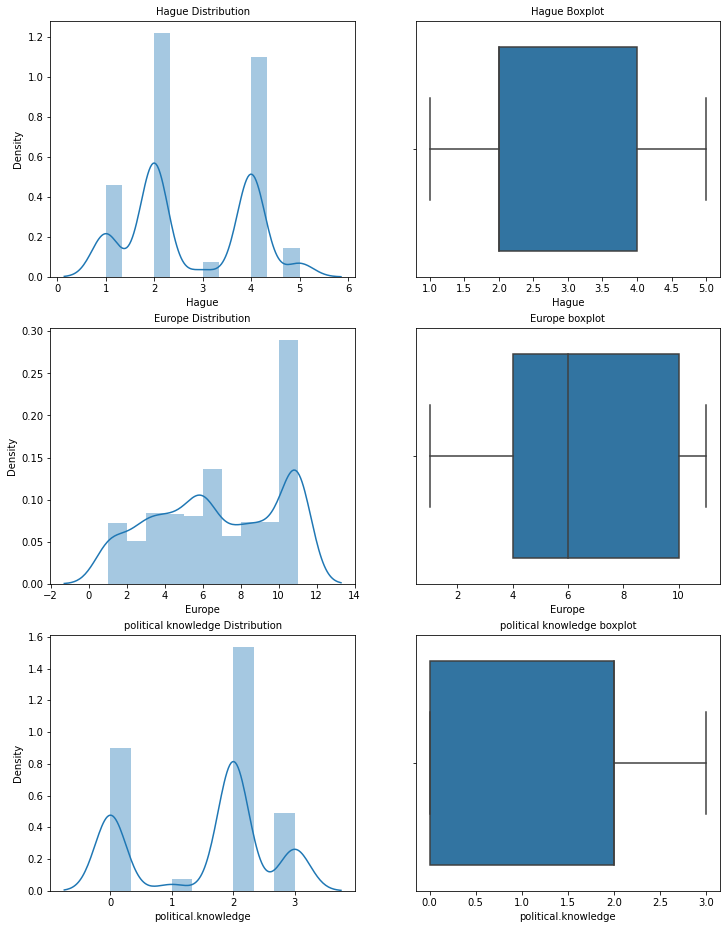

In [23]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,16)
a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(data_df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(data_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(data_df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(data_df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

#### Count Plot 

<AxesSubplot:xlabel='vote', ylabel='count'>

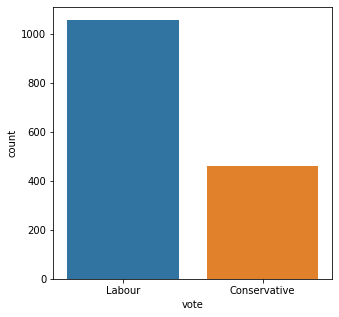

In [24]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='vote',data=data_df)

<AxesSubplot:xlabel='age', ylabel='count'>

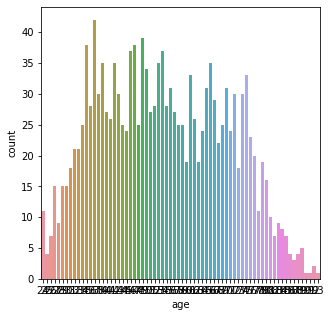

In [25]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='age',data=data_df)

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

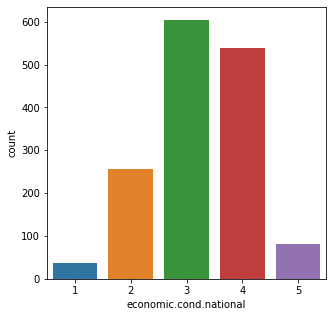

In [26]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='economic.cond.national',data=data_df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

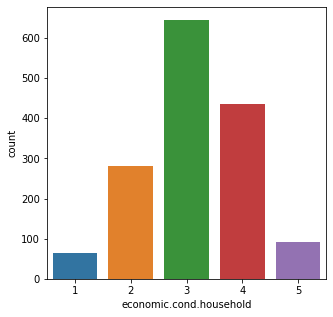

In [27]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='economic.cond.household',data=data_df)

<AxesSubplot:xlabel='Blair', ylabel='count'>

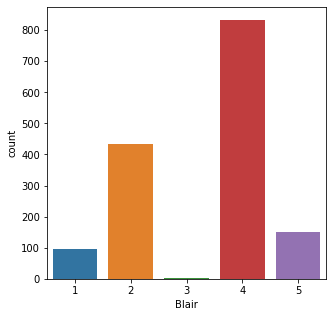

In [28]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Blair',data=data_df)

<AxesSubplot:xlabel='Hague', ylabel='count'>

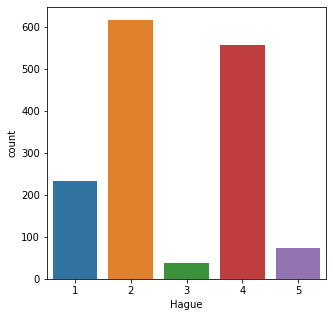

In [29]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Hague',data=data_df)

<AxesSubplot:xlabel='Europe', ylabel='count'>

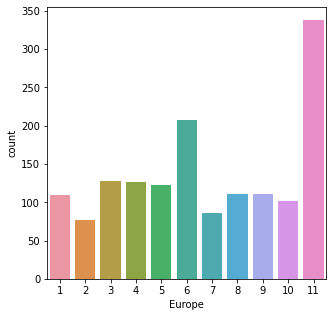

In [30]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Europe',data=data_df)

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

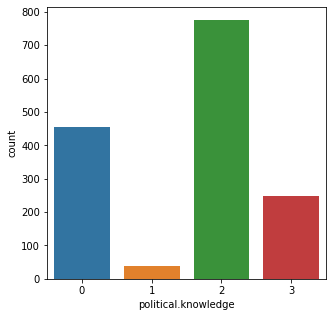

In [31]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='political.knowledge',data=data_df)

<AxesSubplot:xlabel='gender', ylabel='count'>

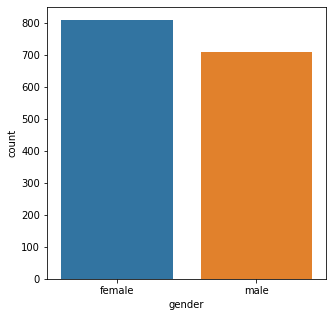

In [32]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='gender',data=data_df)

### Bivariate and Multivariate Analysis

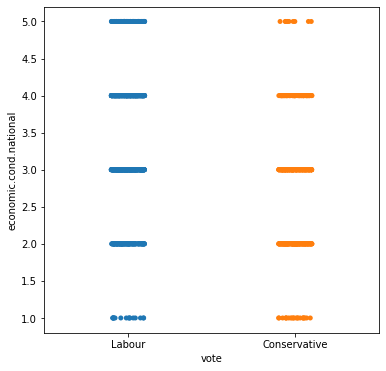

In [33]:
plt.figure(figsize=(6,6))
sns.stripplot(data_df["vote"], data_df['economic.cond.national'], jitter=True) 
plt.show()

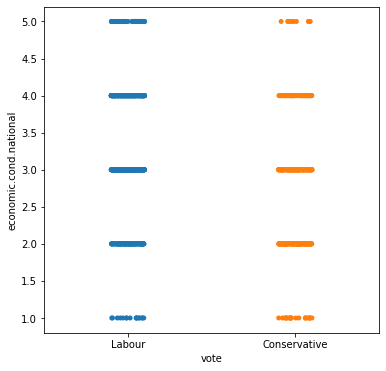

In [34]:
plt.figure(figsize=(6,6))
sns.stripplot(data_df["vote"], data_df['economic.cond.national'], jitter=True) 
plt.show()

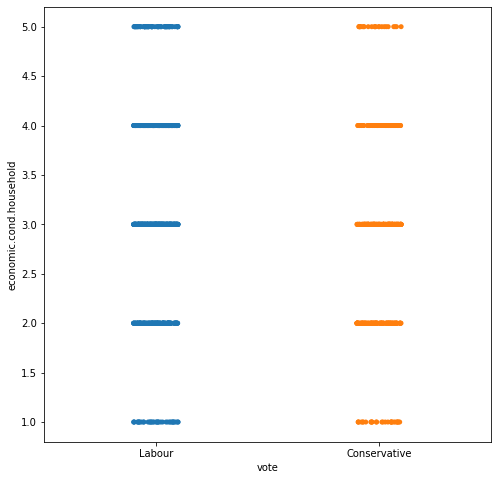

In [35]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['economic.cond.household'], jitter=True) 
plt.show()

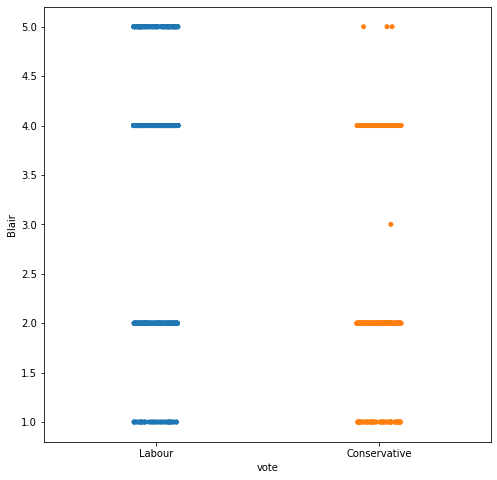

In [36]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Blair'], jitter=True) 
plt.show()

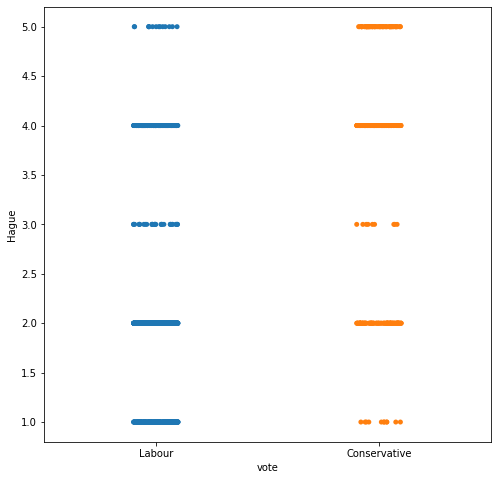

In [37]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Hague'], jitter=True) 
plt.show()

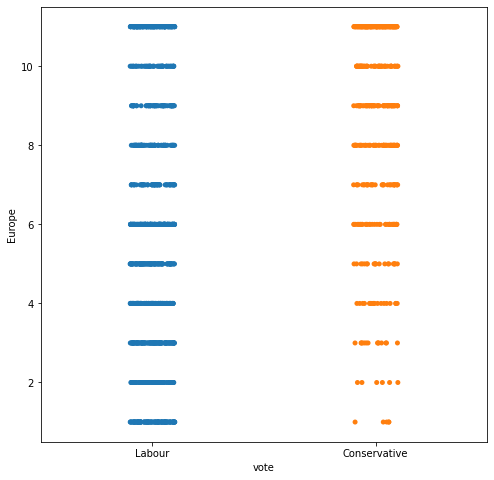

In [38]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Europe'], jitter=True) 
plt.show()

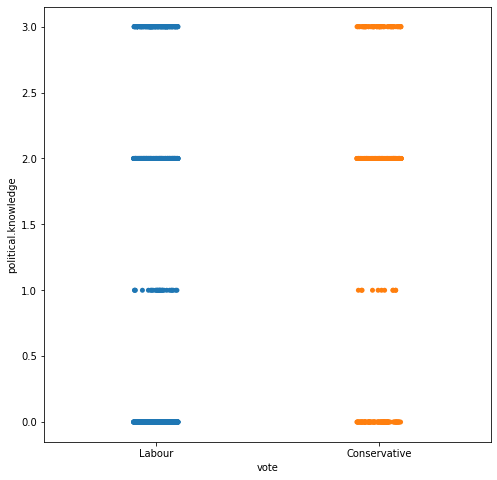

In [39]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['political.knowledge'], jitter=True) 
plt.show()

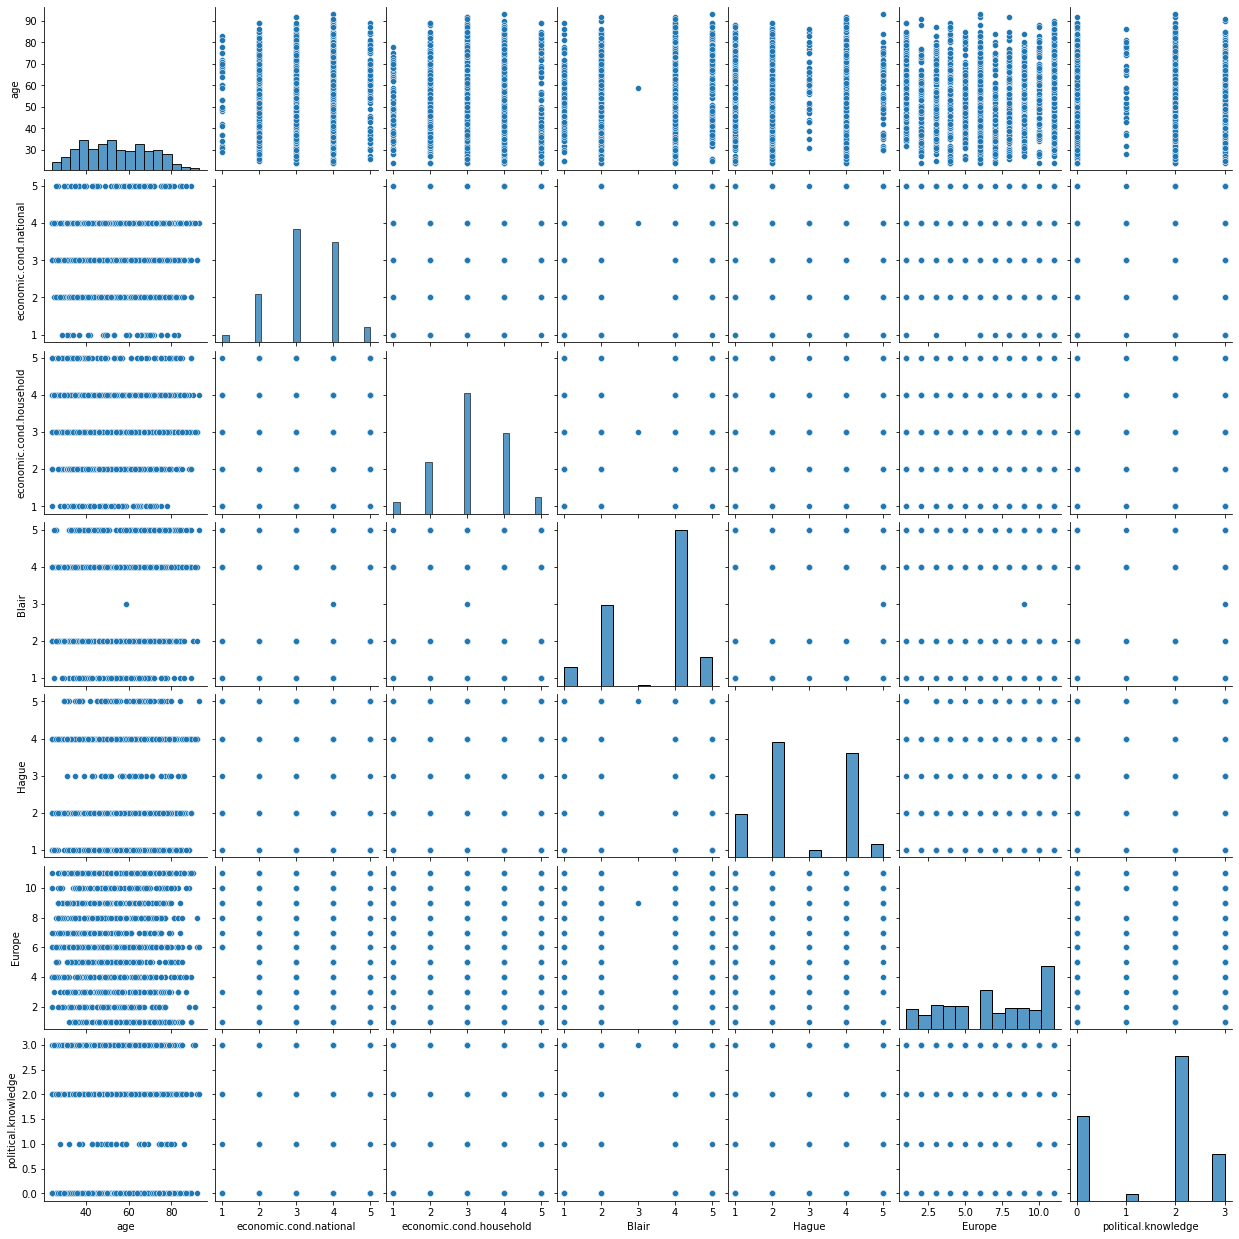

In [40]:
sns.pairplot(data_df)

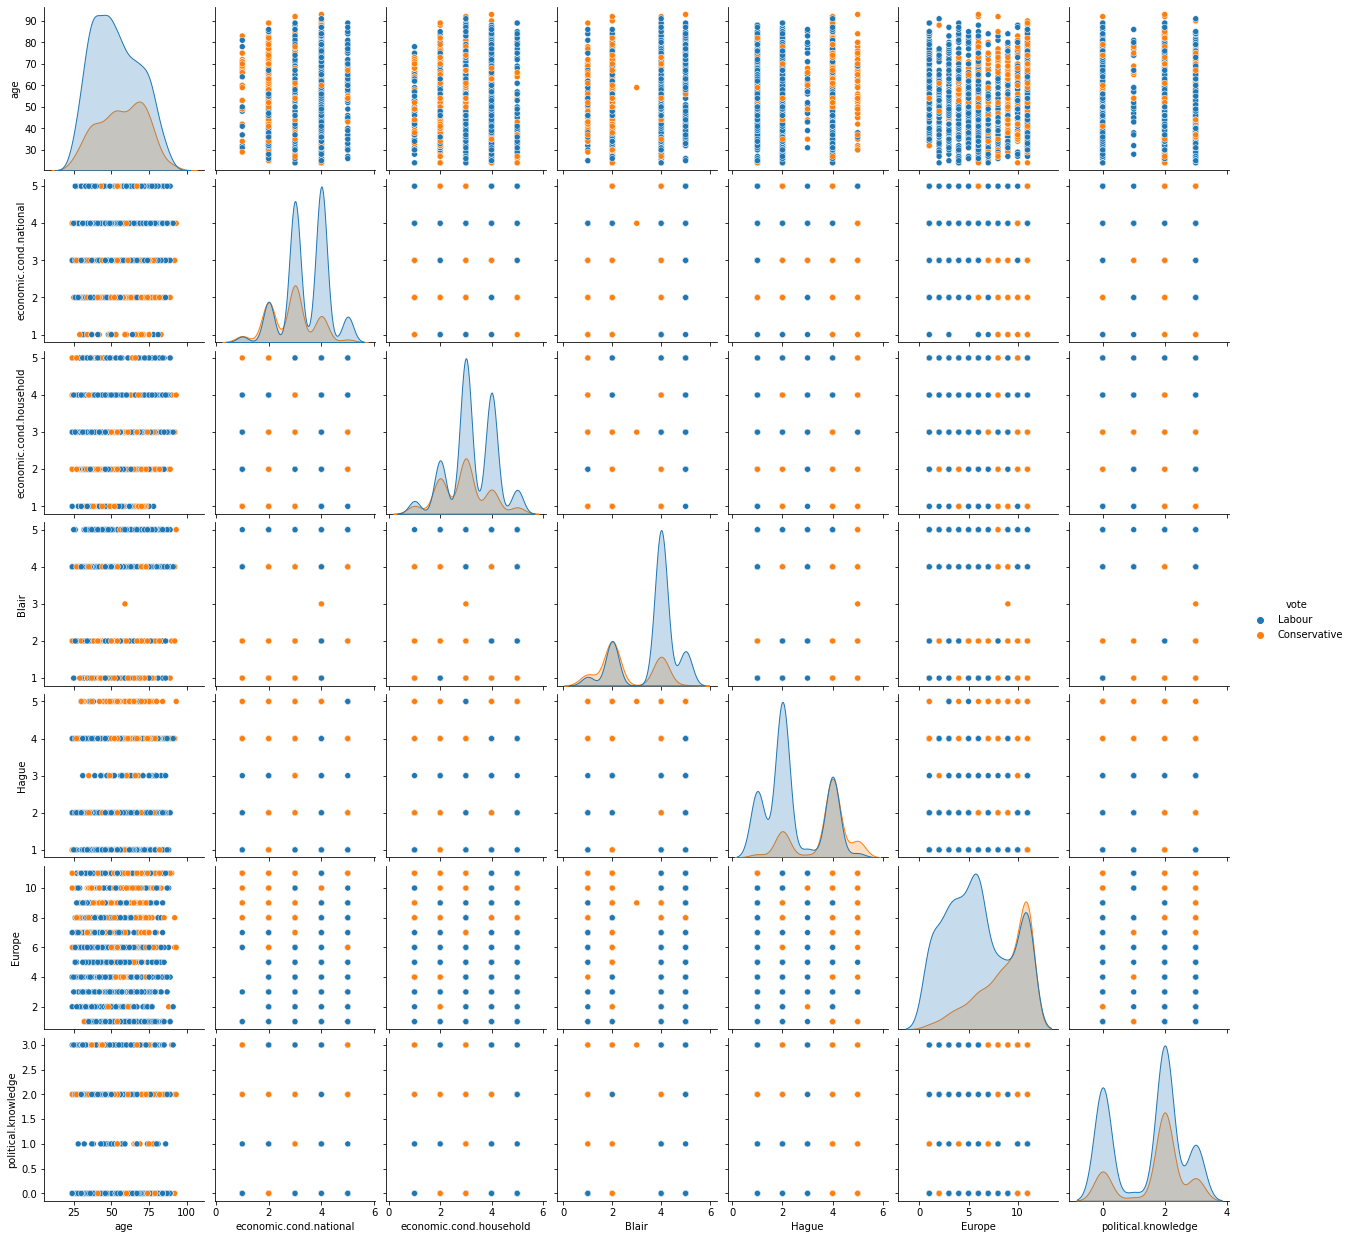

In [41]:
sns.pairplot(data_df, hue='vote')

<AxesSubplot:>

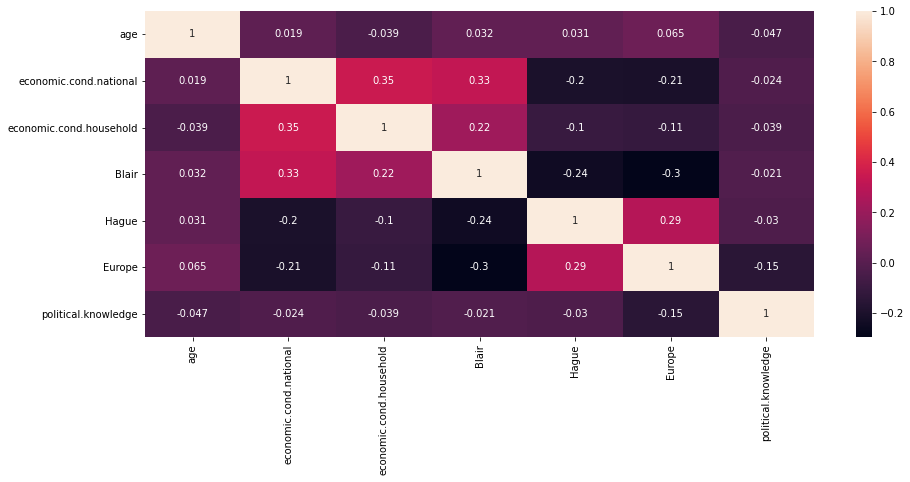

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(),annot=True)

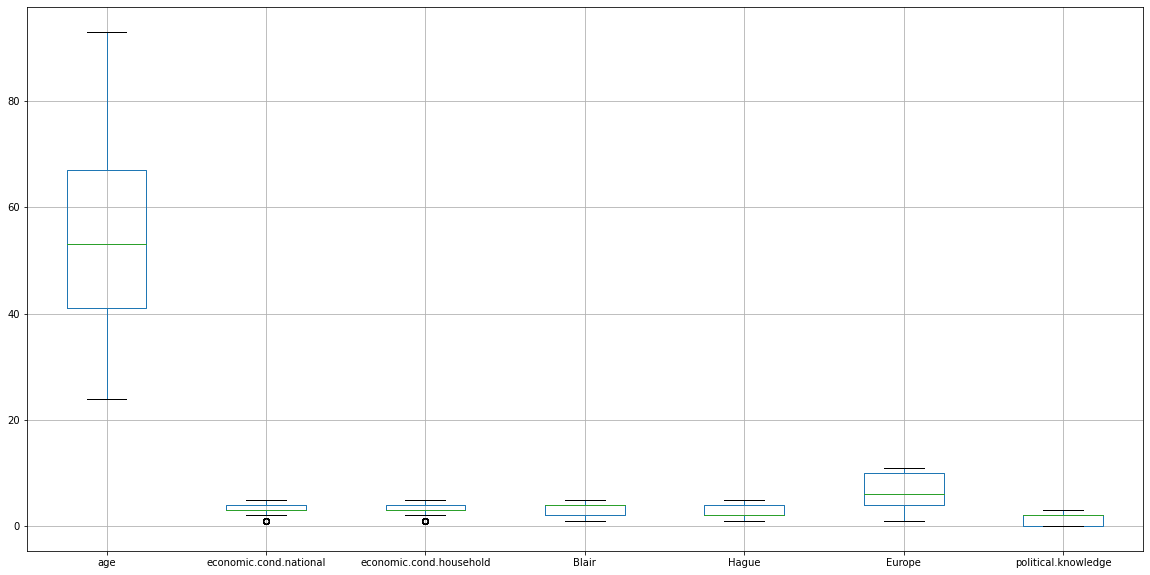

In [43]:
plt.figure(figsize=(20,10))
data_df.boxplot()
plt.show()

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)?

In [112]:
for feature in data_df.columns:
    if data_df[feature].dtype == 'object':
        print('\n')
        print('feature : ', feature)
        print(pd.Categorical(data_df[feature].unique()))
        print(pd.Categorical(data_df[feature].unique()).codes)
        data_df[feature]=pd.Categorical(data_df[feature]).codes

In [113]:
data_df.head()

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

### Scaling

We are not going to scale the data for Logistic regression, LDA and Naive Baye’s models as 
it is not necessary.
But in case of KNN it is necessary to scale the data, as it a distance-based algorithm 
(typically based on Euclidean distance). Scaling the data gives similar weightage to all the 
variables

### Splitting the data into train and test

In [114]:
X=data_df.drop('vote',axis=1)
y=data_df['vote']

In [115]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=1)

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. 

### Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [117]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [118]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



the auc 0.888 


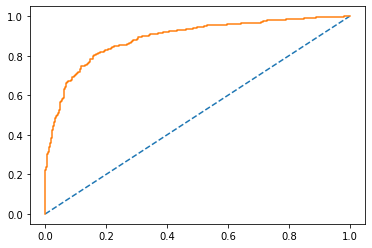

In [119]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [120]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



the auc curve 0.876 


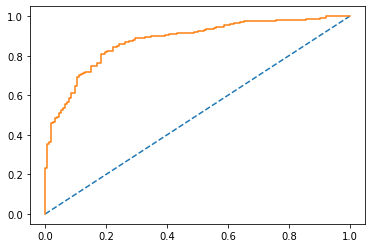

In [121]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### KNN

In [122]:
X.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  Europe  \
0   43                       3                        3      4      1       2   
1   36                       4                        4      4      4       5   
2   35                       4                        4      5      2       3   
3   24                       4                        2      2      1       4   
4   41                       2                        2      1      1       6   

   political.knowledge  gender  
0                    2       0  
1                    2       1  
2                    2       1  
3                    0       0  
4                    2       1

In [123]:
from scipy.stats import zscore

In [124]:
X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]=X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].apply(zscore)

In [125]:
X.head(10)

age  economic.cond.national  economic.cond.household     Blair  \
0 -0.716161               -0.278185                -0.148020  0.565802   
1 -1.162118                0.856242                 0.926367  0.565802   
2 -1.225827                0.856242                 0.926367  1.417312   
3 -1.926617                0.856242                -1.222408 -1.137217   
4 -0.843577               -1.412613                -1.222408 -1.988727   
5 -0.461328               -0.278185                 0.926367  0.565802   
6  0.175754               -1.412613                -1.222408  0.565802   
7  1.449918               -0.278185                 0.926367  0.565802   
8 -0.970994               -0.278185                -0.148020  0.565802   
9  1.003961               -0.278185                -1.222408  1.417312   

      Hague    Europe  political.knowledge  gender  
0 -1.419969 -1.437338             0.423832       0  
1  1.014951 -0.527684             0.423832       1  
2 -0.608329 -1.134120             0.423832       1  
3 -1.419969 -0.830902            -1.421084       0  
4 -1.419969 -0.224465             0.423832       1  
5  1.014951 -0.830902             0.423832       1  
6  1.014951  1.291625             0.423832       1  
7 -1.419969 -1.740556            -1.421084       1  
8  1.014951  1.291625            -1.421084       0  
9 -1.419969  1.291625             0.423832       1

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state=1)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [128]:
Y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,Y_train)

In [129]:
print(KNN_model_score)

0.8583992963940194


In [130]:
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))

[[234  93]
 [ 68 742]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       327
           1       0.89      0.92      0.90       810

    accuracy                           0.86      1137
   macro avg       0.83      0.82      0.82      1137
weighted avg       0.86      0.86      0.86      1137



## AUC ROC Curve KNN Train

the auc 0.928 


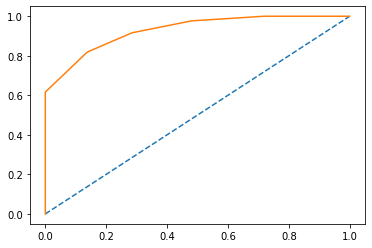

In [131]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train, probs_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [132]:
Y_test_predict = KNN_model.predict(X_test)

KNN_model_score = KNN_model.score(X_test, Y_test)

print(KNN_model_score)

0.8210526315789474


In [133]:
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

[[ 88  45]
 [ 23 224]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       133
           1       0.83      0.91      0.87       247

    accuracy                           0.82       380
   macro avg       0.81      0.78      0.79       380
weighted avg       0.82      0.82      0.82       380



## AUC ROC Curve KNN Test

the auc curve 0.876 


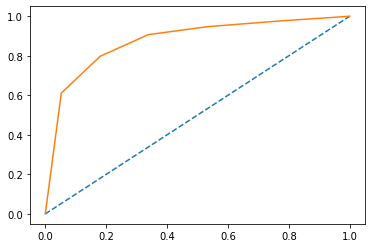

In [134]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test, probs_test)
print("the auc curve %.3f " % auc)

test_fpr, test_tpr, test_threshold = roc_curve(Y_test, probs_test)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [135]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [136]:
Y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, Y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.8522427440633246
[[229  98]
 [ 70 740]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       327
           1       0.88      0.91      0.90       810

    accuracy                           0.85      1137
   macro avg       0.82      0.81      0.81      1137
weighted avg       0.85      0.85      0.85      1137



In [137]:
Y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, Y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8289473684210527
[[ 93  40]
 [ 25 222]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       133
           1       0.85      0.90      0.87       247

    accuracy                           0.83       380
   macro avg       0.82      0.80      0.81       380
weighted avg       0.83      0.83      0.83       380



In [138]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [139]:
Y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, Y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.8583992963940194
[[234  93]
 [ 68 742]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       327
           1       0.89      0.92      0.90       810

    accuracy                           0.86      1137
   macro avg       0.83      0.82      0.82      1137
weighted avg       0.86      0.86      0.86      1137



In [140]:
Y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, Y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8210526315789474
[[ 88  45]
 [ 23 224]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       133
           1       0.83      0.91      0.87       247

    accuracy                           0.82       380
   macro avg       0.81      0.78      0.79       380
weighted avg       0.82      0.82      0.82       380



In [141]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores = knn.score(X_test,Y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.20789473684210524,
 0.1947368421052632,
 0.17894736842105263,
 0.17105263157894735,
 0.17894736842105263,
 0.1763157894736842,
 0.17894736842105263,
 0.17105263157894735,
 0.17105263157894735,
 0.1763157894736842]

## AUC ROC curve after n classifier for train data set

the auc curve 0.904 


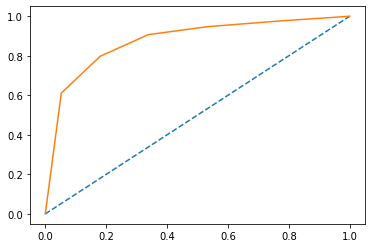

In [142]:
probs_train=knn.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(Y_train, probs_train)
print("the auc curve %.3f " % auc)

train_fpr, train_tpr, train_threshold = roc_curve(Y_train, probs_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

## AUC ROC curve after n classifier for test data set

the auc curve 0.897 


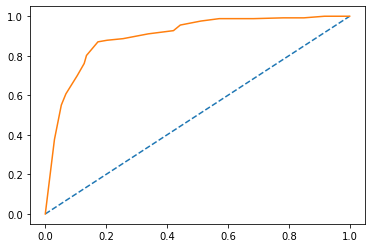

In [143]:
probs_test = knn.predict_proba(X_test)
probs_test = probs_test[:,1]
auc = roc_auc_score(Y_test, probs_test)
print("the auc curve %.3f " % auc)

test_fpr, test_tpr, test_threshold = roc_curve(Y_test, probs_test)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

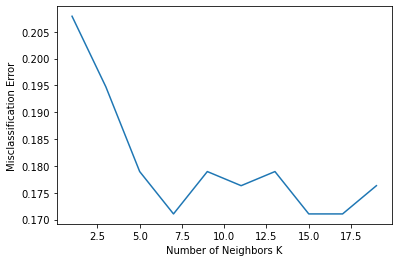

In [144]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). 

## Discriminant Analysis

In [145]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [146]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [147]:
Y_train_predict = LDA_model.predict(X_train)
LDA_model_score = LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.8372911169744943
[[216 111]
 [ 74 736]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       327
           1       0.87      0.91      0.89       810

    accuracy                           0.84      1137
   macro avg       0.81      0.78      0.79      1137
weighted avg       0.83      0.84      0.83      1137



## AUC ROC curve for LDA Train

the auc 0.888 


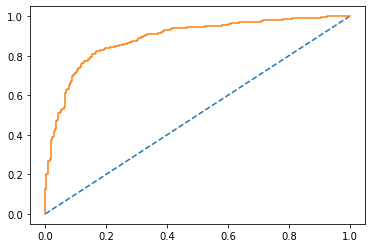

In [148]:
probs_train = LDA_model.predict_proba(X_train)
probs_train = probs_train[:, 1]
auc=roc_auc_score(Y_train, probs_train)
print("the auc %.3f " % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs_train)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [149]:
Y_test_predict = LDA_model.predict(X_test)
LDA_model_score = LDA_model.score(X_test, Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8315789473684211
[[ 94  39]
 [ 25 222]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       133
           1       0.85      0.90      0.87       247

    accuracy                           0.83       380
   macro avg       0.82      0.80      0.81       380
weighted avg       0.83      0.83      0.83       380



## AUC ROC curve for LDA Test

the auc curve 0.893 


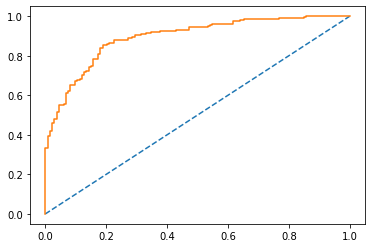

In [150]:
probs_test = LDA_model.predict_proba(X_test)
probs_test = probs_test[:,1]
auc=roc_auc_score(Y_test, probs_test)
print("the auc curve %.3f " % auc)

test_fpr, test_tpr, test_threshold = roc_curve(Y_test, probs_test)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

## Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
Logistic_model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none', verbose = True, n_jobs = 2 )
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [153]:
Y_train_predict = Logistic_model.predict(X_train)
Logistic_model_score = Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.8337730870712401
[[209 118]
 [ 71 739]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       327
           1       0.86      0.91      0.89       810

    accuracy                           0.83      1137
   macro avg       0.80      0.78      0.79      1137
weighted avg       0.83      0.83      0.83      1137



In [154]:
Y_train_prob = Logistic_model.predict_proba(X_train)
pd.DataFrame(Y_train_prob).head()

0         1
0  0.058842  0.941158
1  0.044556  0.955444
2  0.690516  0.309484
3  0.036543  0.963457
4  0.014646  0.985354

In [155]:
Logistic_model.score(X_train,Y_train)

0.8337730870712401

## AUC ROC curve for Logistic Regression Train

AUC: 0.888


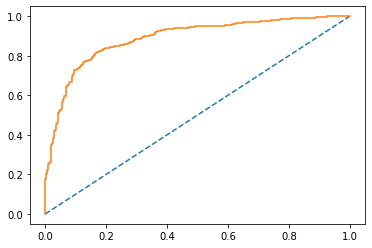

In [156]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [157]:
Y_test_predict = Logistic_model.predict(X_test)
Logistic_model_score = Logistic_model.score(X_test, Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8289473684210527
[[ 94  39]
 [ 26 221]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       133
           1       0.85      0.89      0.87       247

    accuracy                           0.83       380
   macro avg       0.82      0.80      0.81       380
weighted avg       0.83      0.83      0.83       380



In [158]:
Y_test_prob = Logistic_model.predict_proba(X_test)
pd.DataFrame(Y_test_prob).head()


0         1
0  0.409277  0.590723
1  0.140808  0.859192
2  0.008512  0.991488
3  0.818999  0.181001
4  0.081087  0.918913

## AUC ROC curve for Logistic Regression Test

AUC: 0.889


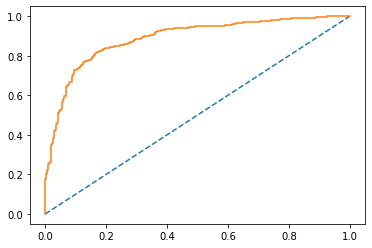

In [159]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

## Model tuning

#### Using GridSearchCV and tuning the model which helps us in finding the best parameters for the model

##### Logistic Regression

In [99]:
grid = {'penalty' : ['l2','none'],
                     'solver':['saga','lbfgs','newton-cg'],
                     'tol':[0.1,0.01,0.001],
                     'max_iter':[100,200,300,400,500],
                     'n_jobs':[1,2,3]}

In [100]:
Model = LogisticRegression()

In [101]:
grid_search = GridSearchCV(estimator=Model,param_grid=grid,cv=5)

In [102]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 400, 500],
                         'n_jobs': [1, 2, 3], 'penalty': ['l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'newton-cg'],
                         'tol': [0.1, 0.01, 0.001]})

In [103]:
grid_search.best_params_

{'max_iter': 200, 'n_jobs': 2, 'penalty': 'none', 'solver': 'saga', 'tol': 0.1}

In [104]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=200, n_jobs=2, penalty='none', solver='saga',
                   tol=0.1)

### Predicting the train and test

In [105]:
ytrain_pred = best_model.predict(X_train)
ytest_pred = best_model.predict(X_test)

In [106]:
ytest_pred_prob = best_model.predict_proba(X_test)
pd.DataFrame(ytest_pred_prob).head()

0         1
0  0.414192  0.585808
1  0.149465  0.850535
2  0.008295  0.991705
3  0.819464  0.180536
4  0.075136  0.924864

### Basic Decision Tree classifier with gini index and random state of 1

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
DT = DecisionTreeClassifier(criterion='gini',random_state=1)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [109]:
y_dt_train = DT.predict(X_train)
y_dt_test = DT.predict(X_test)

In [111]:
DTR = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
DTR.fit(X_train,Y_train)
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))

0.8468941382327209
0.8219895287958116


In [112]:
print(pd.DataFrame(DTR.feature_importances_,columns=["Imp"],index=X_train.columns))

                              Imp
age                      0.033378
economic.cond.national   0.000000
economic.cond.household  0.016141
Blair                    0.167935
Hague                    0.428198
Europe                   0.212657
political.knowledge      0.141690
IsMale_or_not            0.000000


## Bagging Train

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [161]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [162]:
cart = DecisionTreeClassifier()
Bagging_model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [163]:
Y_train_predict = Bagging_model.predict(X_train)
Bagging_model_score = Bagging_model.score(X_train, Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



## AUC _ROC Curve Bagging Train

AUC: 1.000


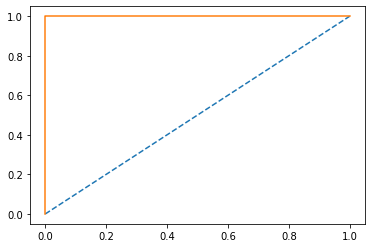

In [164]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

## Bagging Test

In [165]:
Y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8223684210526315
[[108  45]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



## AUC _ROC Curve Bagging Test

AUC: 0.882


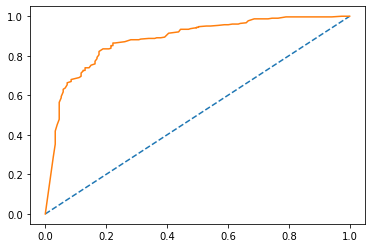

In [166]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

## Boosting Train

## Ada Boost

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [168]:
ADB_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ADB_model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [169]:
Y_train_predict = ADB_model.predict(X_train)
ADB_model_score = ADB_model.score(X_train, Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.915


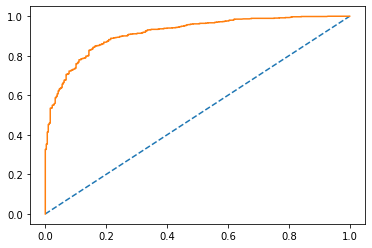

In [170]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

## Gradient Boosting

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(random_state = 1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [172]:
Y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)

print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



## AUC _ROC Curve Boosting Train

AUC: 0.951


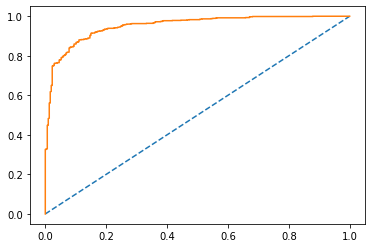

In [173]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

## ADA Boosting Test

In [174]:
Y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)

print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



## AUC _ROC Curve Boosting Test

AUC: 0.877


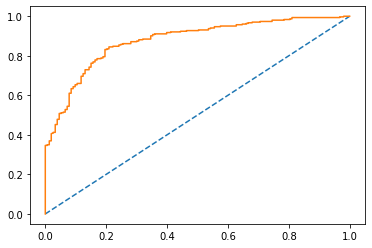

In [175]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

## Gradient Boosting Test

In [176]:
Y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)

print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



## Gradient Boosting AUC_ROC Curve Test

AUC: 0.899


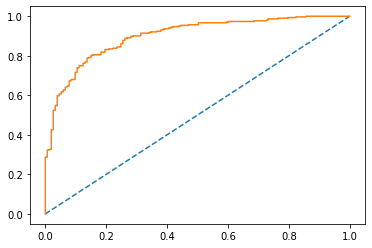

In [177]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[8,9,10],
    'max_features':[5,6,7],
    'min_samples_leaf':[9,12,15],
    'min_samples_split':[50,70],
    'n_estimators':[50,100],
    'random_state':[1]
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=5)

In [115]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [9, 12, 15],
                         'min_samples_split': [50, 70],
                         'n_estimators': [50, 100], 'random_state': [1]})

In [116]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 50,
 'random_state': 1}

#### Random Forest - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl6 = BaggingClassifier(base_estimator=grid_search,n_estimators=5,random_state=1)

bgcl6 = bgcl6.fit(X_train,Y_train)

In [ ]:
y_rf_train = bgcl6.predict(X_train)
y_rf_bg_test = bgcl6(X_test)

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. 

#### ** Note I have completed this question with 1.4, 1.5.
    i.e. why didn't did it here again

### We have tuned hyperparameter tuning and used SMOTE to reduce overfitting. We can make following observations:
•	Bagging model is not very suitable and has overfitting issues
•	Remaining models are relatively suitable for making predictions. However, the predictions are more reliable for Labour party
•	Tuning and SMOTE has not improved model performance to a great extent.
•	Except Bagging, other models have performed well enough in both training and test data set


# Problem 2:

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
1.	President Franklin D. Roosevelt in 1941
2.	President John F. Kennedy in 1961
3.	President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)


In [8]:
import numpy as np
import pandas as pd


In [1]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## 2.1 Find the number of characters, words, and sentences for the mentioned documents. 

In [2]:
# number of characters in each file

no_of_characters_roosevelt = len(roosevelt)
print("Number of characters in Roosevelt file are : ", no_of_characters_roosevelt)

no_of_characters_kennedy = len(roosevelt)
print("Number of characters in Kennedy file are : ", no_of_characters_kennedy)

no_of_characters_nixon = len(nixon)
print("Number of characters in Nixon file are : ", no_of_characters_nixon)

Number of characters in Roosevelt file are :  7571
Number of characters in Kennedy file are :  7571
Number of characters in Nixon file are :  9991


In [3]:
# Number of words in each file

x = inaugural.raw('1941-Roosevelt.txt') 
words_roosevelt = x.split()
print("Number of words in Roosevelt file are ", len(words_roosevelt))

Number of words in Roosevelt file are  1360


In [4]:
y = inaugural.raw('1961-Kennedy.txt') 
words_kennedy = y.split()
print("Number of words in Kennedy file are ", len(words_kennedy))

Number of words in Kennedy file are  1390


In [5]:
z = inaugural.raw('1973-Nixon.txt') 
words_nixon = z.split()
print("Number of words in Nixon file are ", len(words_nixon))

Number of words in Nixon file are  1819


In [9]:
# number of senetences in each file

# Roosevelt file
x = pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')}, index=[0])
x['sentences'] = x['Text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
x

Text  sentences
0  On each national day of inauguration since 178...         67

In [10]:
# Kennedy file

y = pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')}, index=[0])
y['sentences'] = y['Text'].apply(lambda y:len([y for y in y.split() if y.endswith('.')]))
y

Text  sentences
0  Vice President Johnson, Mr. Speaker, Mr. Chief...         52

In [11]:
# Nixon file

z = pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')}, index=[0])
z['sentences'] = z['Text'].apply(lambda z:len([z for z in z.split() if z.endswith('.')]))
z


Text  sentences
0  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...         68

## 2.2 Remove all the stopwords from all three speeches. 

In [12]:
# remove all the stopwords from the roosevelt speech
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words_roosevelt = set(stopwords.words('english'))
word_tokens_roosevelt = word_tokenize(roosevelt)

filtered_sentence = [w for w in word_tokens_roosevelt if not w in stop_words_roosevelt]

filtered_sentence = []

for w in word_tokens_roosevelt:
    if w not in stop_words_roosevelt:
        filtered_sentence.append(w)
        
print(word_tokens_roosevelt)
print(filtered_sentence)




['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [13]:
# remove all the stopwords from the kennedy speech

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words_kennedy = set(stopwords.words('english'))
word_tokens_kennedy = word_tokenize(kennedy)

filtered_sentence = [w for w in word_tokens_kennedy if not w in stop_words_kennedy]

filtered_sentence = []

for w in word_tokens_kennedy:
    if w not in stop_words_kennedy:
        filtered_sentence.append(w)
        
print(word_tokens_kennedy)
print(filtered_sentence)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [14]:
# remove all the stopwords from the nixon speech

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words_nixon = set(stopwords.words('english'))
word_tokens_nixon = word_tokenize(nixon)

filtered_sentence = [w for w in word_tokens_nixon if not w in stop_words_nixon]

filtered_sentence = []

for w in word_tokens_nixon:
    if w not in stop_words_nixon:
        filtered_sentence.append(w)
        
print(word_tokens_nixon)
print(filtered_sentence)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer=RegexpTokenizer(r'\w+')

roosevelt_no_punct = tokenizer.tokenize(roosevelt)

set(w.title() for w in roosevelt_no_punct if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punct if w.lower() not in stopwords.words())

word_count_dict.most_common(3)

[('Nation', 12), ('Know', 10), ('Spirit', 9)]

In [19]:
# For Kennedy

tokenizer=RegexpTokenizer(r'\w+')
kennedy_no_punct = tokenizer.tokenize(kennedy)

set(w.title() for w in kennedy_no_punct if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in kennedy_no_punct if w.lower() not in stopwords.words())

word_count_dict.most_common(3)

[('Let', 16), ('Us', 12), ('World', 8)]

In [20]:
# For Nixon

tokenizer=RegexpTokenizer(r'\w+')
nixon_no_punct = tokenizer.tokenize(nixon)

set(w.title() for w in nixon_no_punct if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in nixon_no_punct if w.lower() not in stopwords.words())

word_count_dict.most_common(3)

[('Us', 26), ('Let', 22), ('America', 21)]

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

#### Word Cloud for inaugural speech

In [21]:
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

import numpy as np
# from PIL import image

nltk.download('inaugural')

from nltk.corpus import inaugural




[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [22]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [23]:
# create stopword list

text = inaugural.raw('1941-Roosevelt.txt')

# Clean text
text = re.sub(r'==.*?==+, ','',text)
text = text.replace('\n', '')



In [24]:
# importing packages for visualization

import matplotlib.pyplot as plt
%matplotlib inline

# function to plot wordcloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")


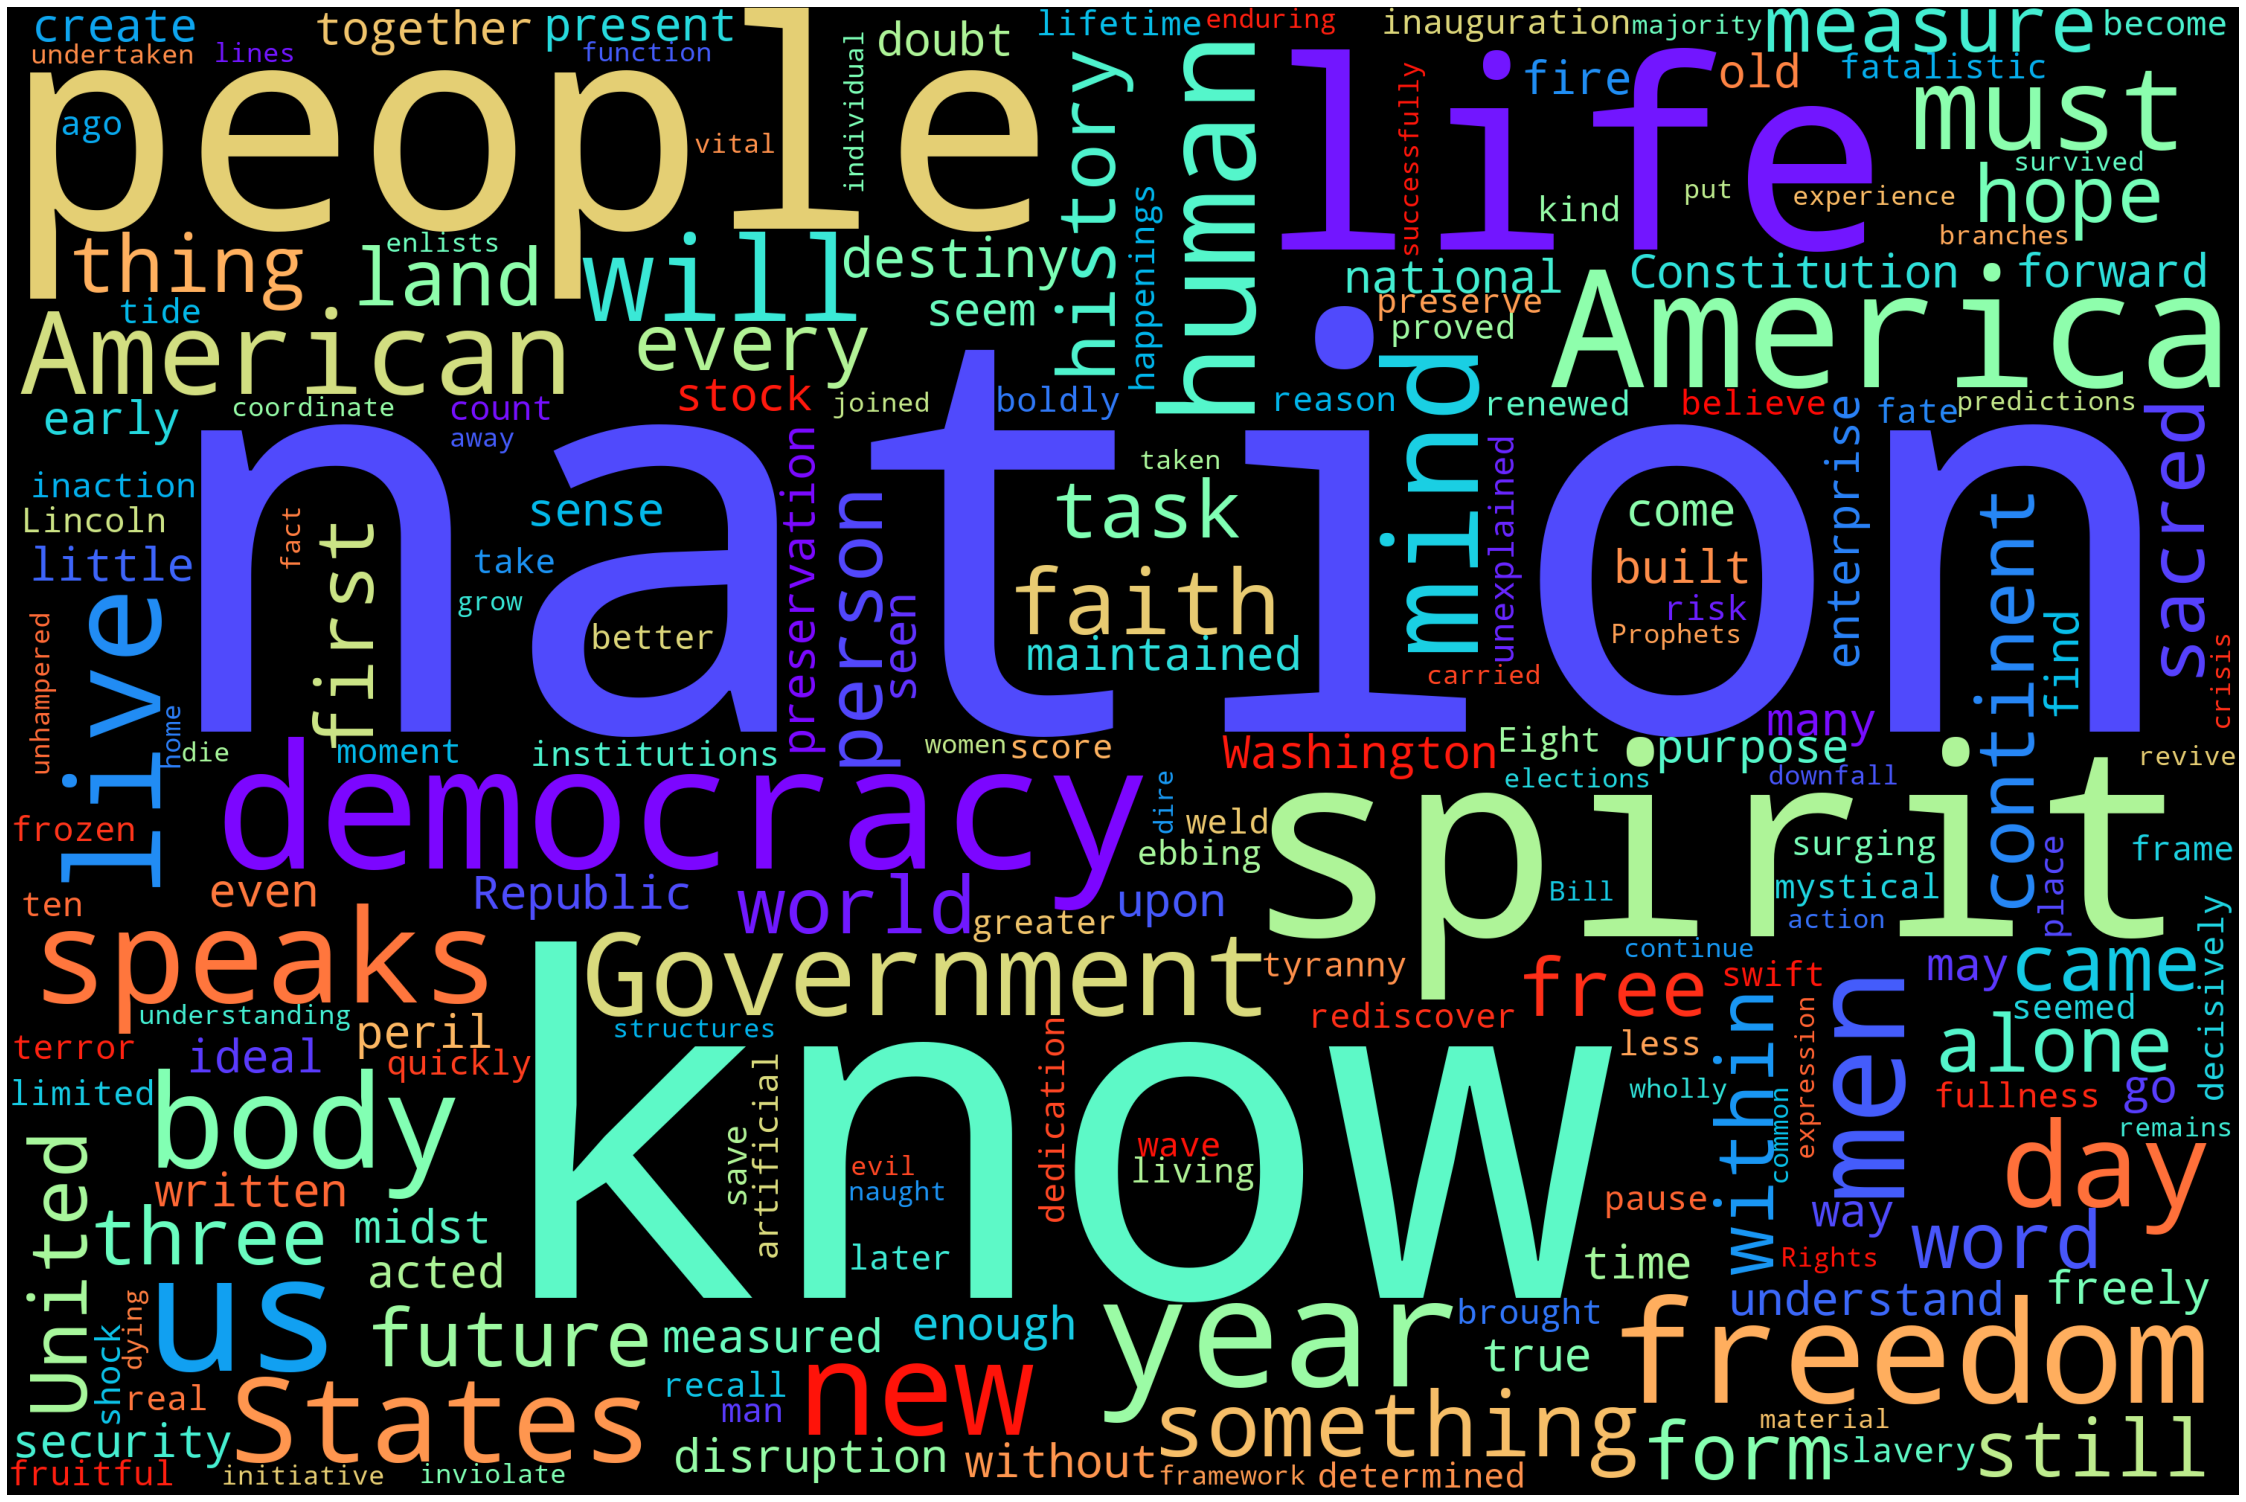

In [25]:
# mask = np.array(Image.open('upvote.png'))
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow',collocations=False).generate(text)

plot_cloud(wordcloud)

#### Word Cloud for kennedy speech

In [30]:
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

import numpy as np
# from PIL import image

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

# create stopword list

text = inaugural.raw('1961-Kennedy.txt')

# Clean text
text = re.sub(r'==.*?==+, ','',text)
text = text.replace('\n', '')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [31]:
# function to plot wordcloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")

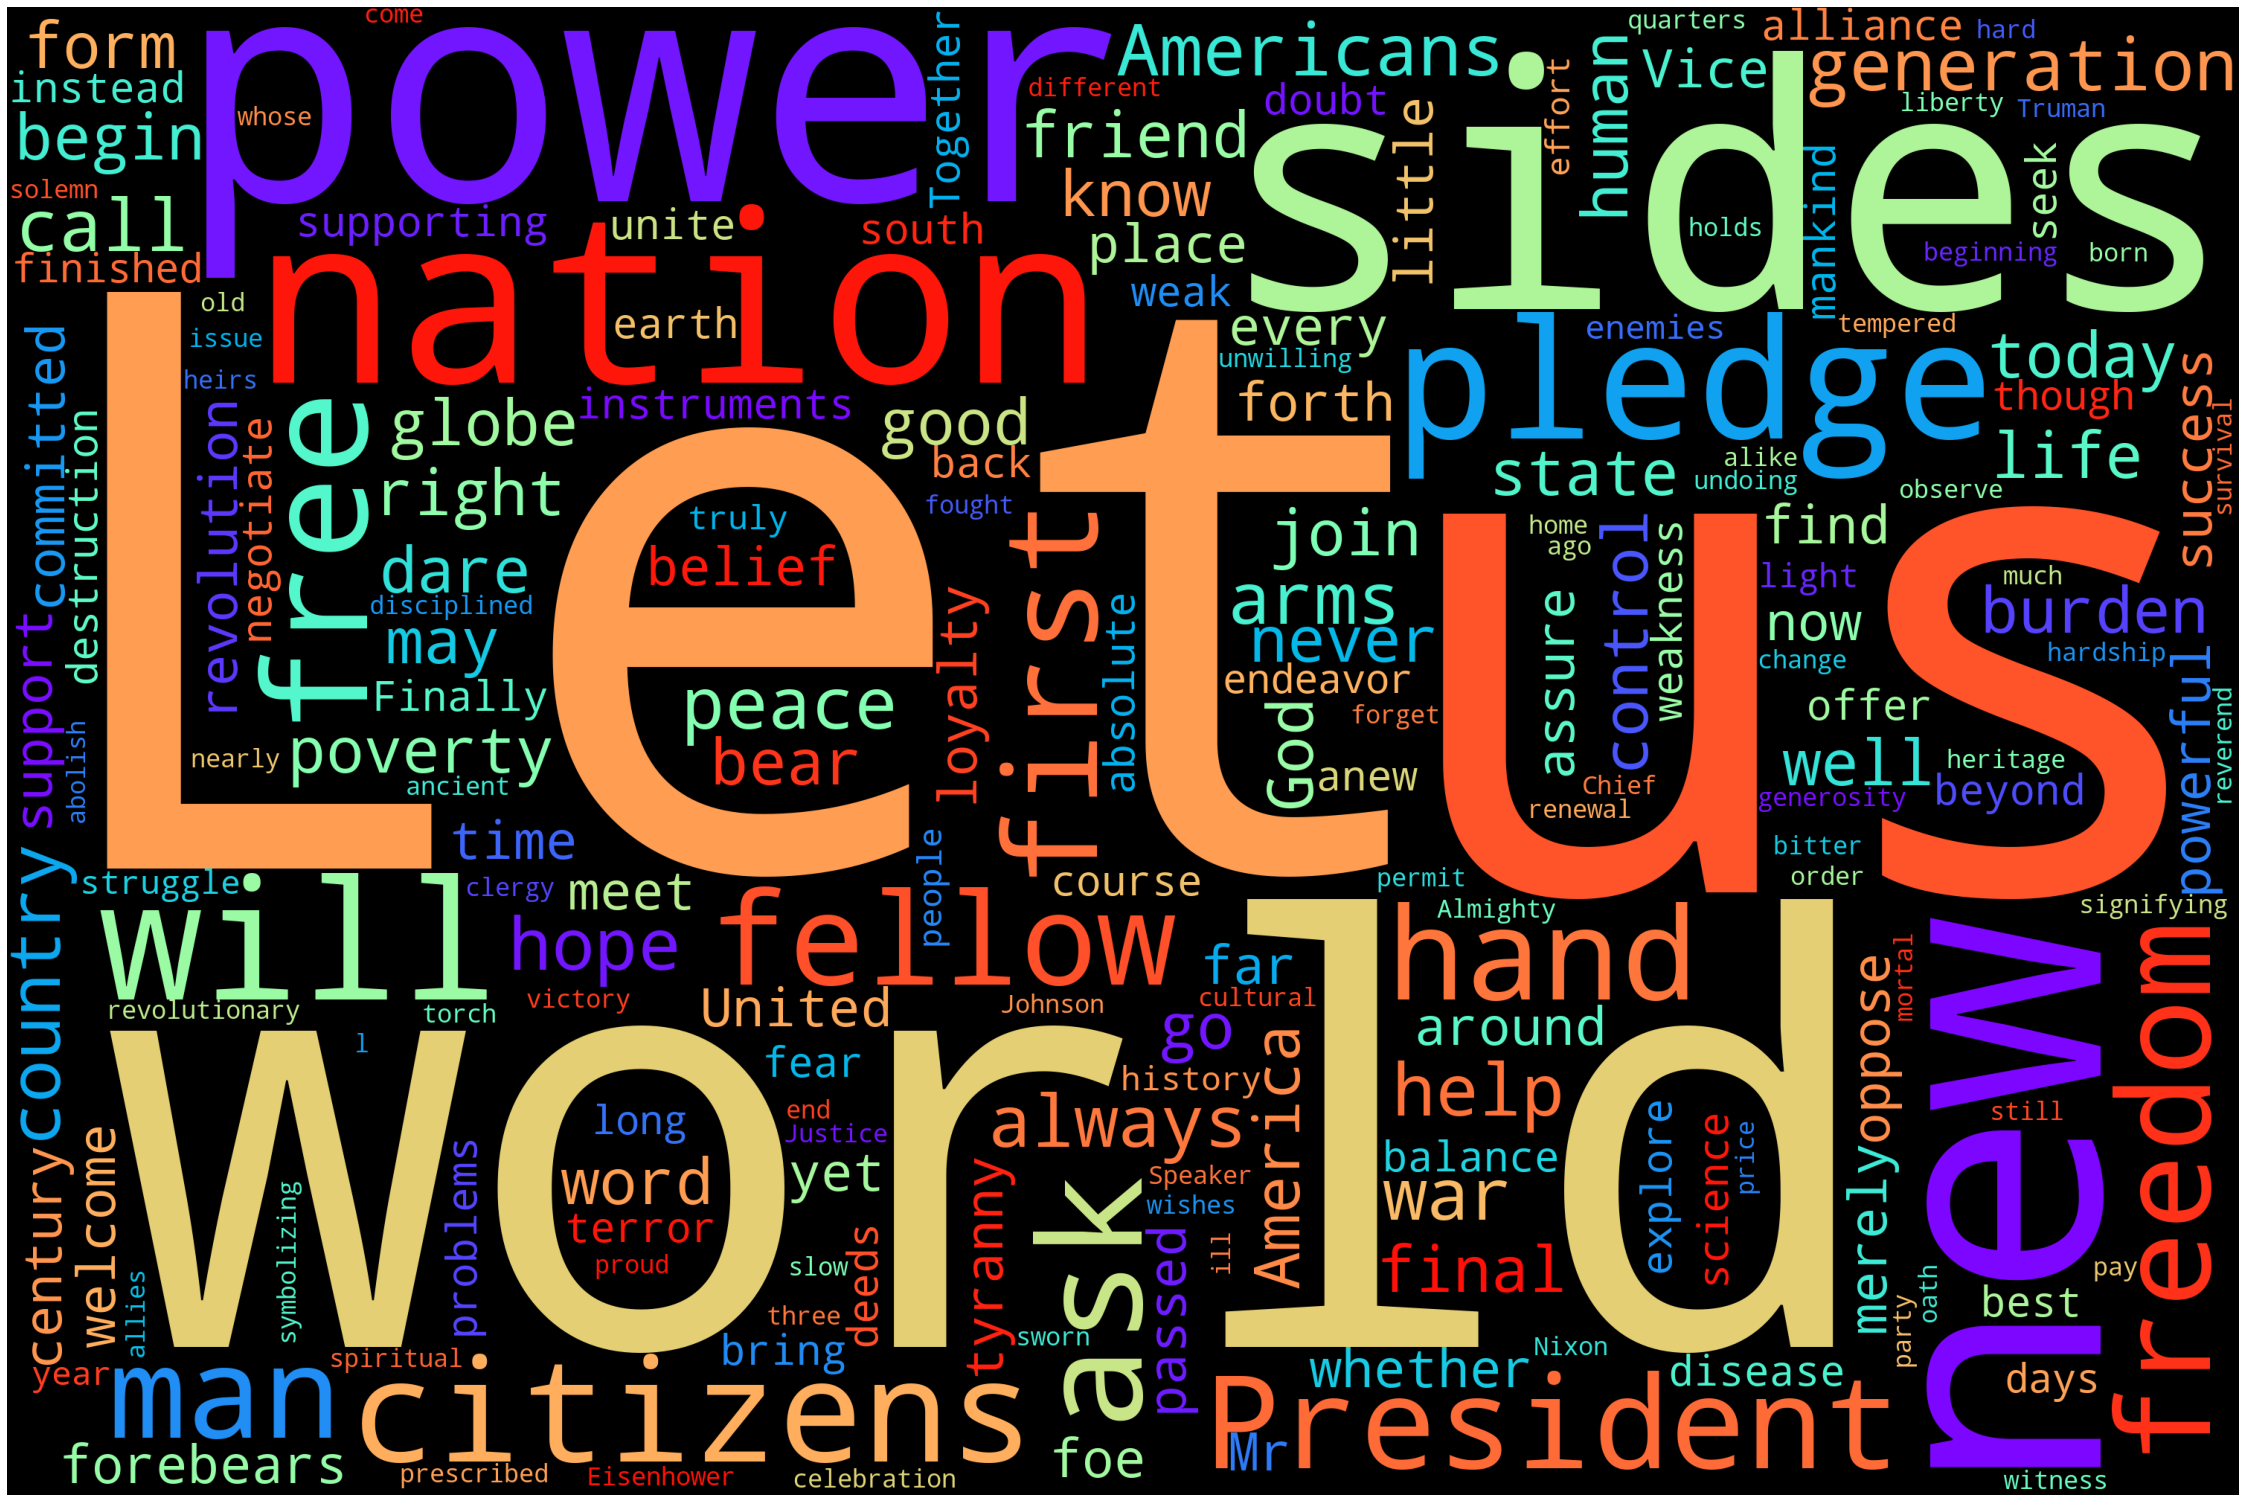

In [32]:
# mask = np.array(Image.open('upvote.png'))
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow',collocations=False).generate(text)

plot_cloud(wordcloud)

#### Word Cloud for nixon speech

In [33]:
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

import numpy as np
# from PIL import image

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

# create stopword list

text = inaugural.raw('1973-Nixon.txt')

# Clean text
text = re.sub(r'==.*?==+, ','',text)
text = text.replace('\n', '')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [34]:
# function to plot wordcloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")

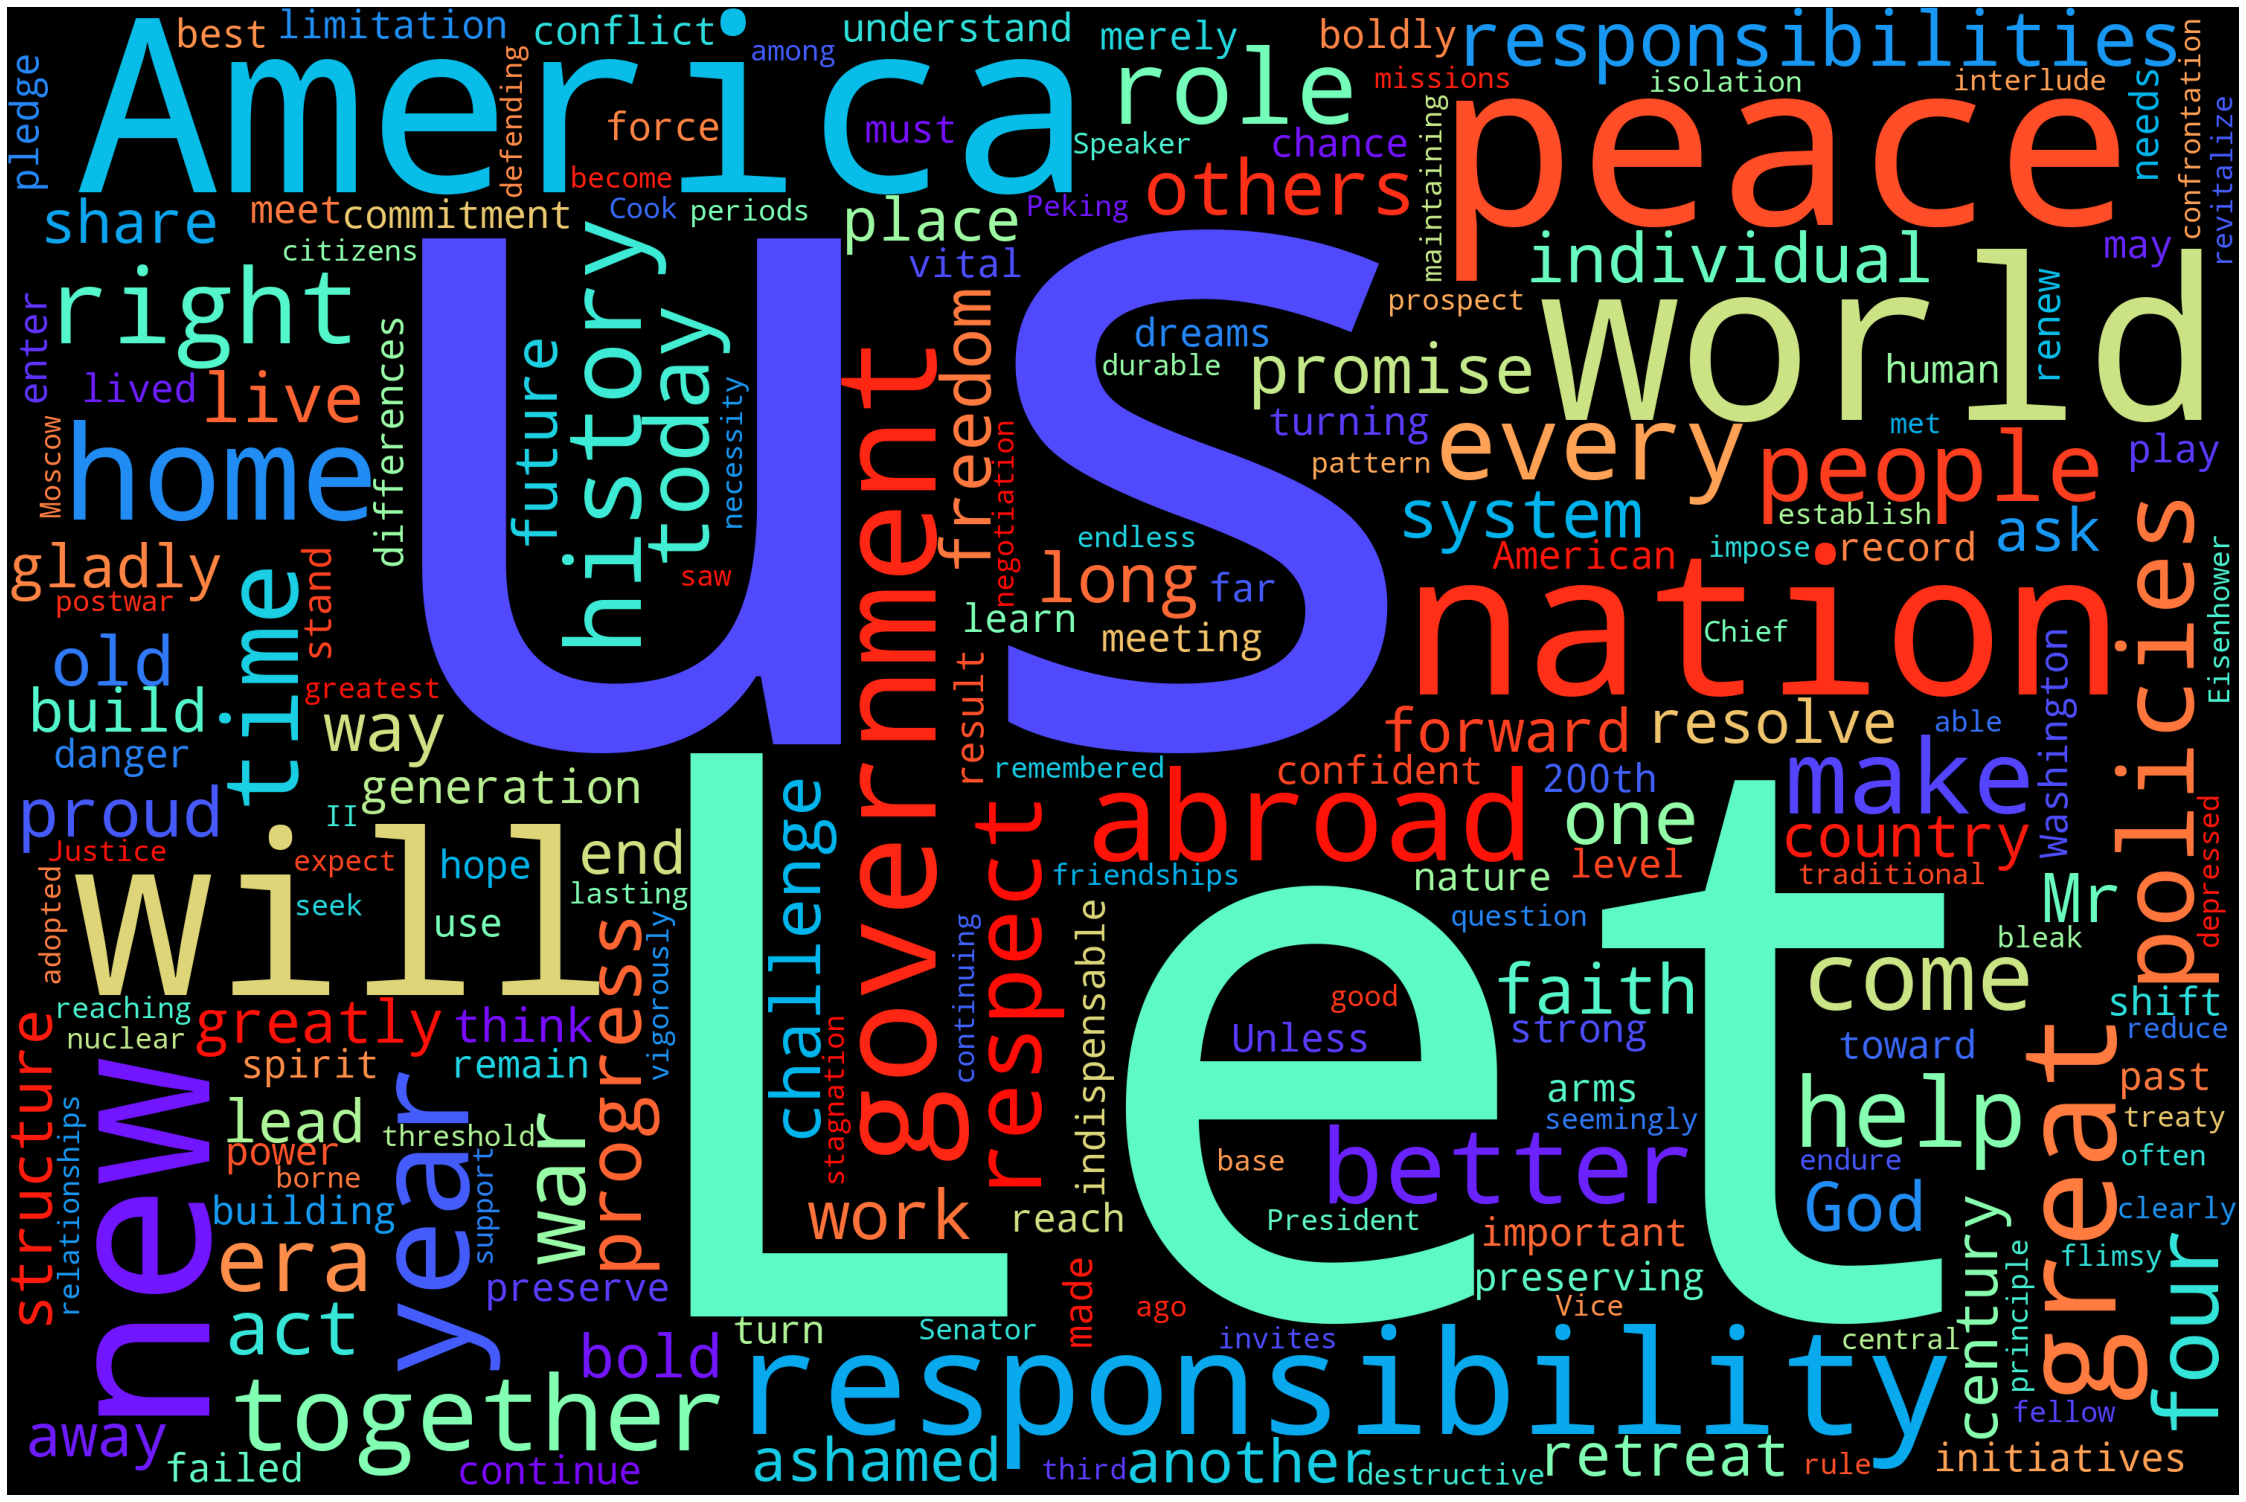

In [35]:
# mask = np.array(Image.open('upvote.png'))
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow',collocations=False).generate(text)

plot_cloud(wordcloud)